[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/intro_to_ai/blob/master/feature_engineering.ipynb)

# Feature Engineering 

## Practicing feature engineering on the Ames Housing Data

In this notebook, we will apply some of the techniques discussed in class to engineer the features of Ames Housing Dataset. It should be noted that the effectiveness of feature engineering can be determined based on the quality of the model built using the data. But, here the goal is to use intuition to apply the techniques. 

## Simple EAD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
from sklearn.preprocessing import OneHotEncoder

#### Load the Data, Examine and Explore

In [9]:
## Load in the Ames Housing Data
datafile = "https://alik-courses.web.app/intro-to-ai/feature_engineering/Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')

In [10]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [23]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [25]:
df.shape

(2930, 82)

In [40]:
df_reduced = df[['MS Zoning', 'Lot Area', 'Neighborhood', 'Bldg Type', 
       'House Style', 'Overall Qual', 'Overall Cond', 
       'Year Built', 'Gr Liv Area', 'Full Bath', 
       'Half Bath', 'Bedroom AbvGr','SalePrice']]

In [30]:
df_reduced.head()

,MS Zoning,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,SalePrice
0,RL,31770,NAmes,1Fam,1Story,6,5,1960,1656,1,0,3,215000
1,RH,11622,NAmes,1Fam,1Story,5,6,1961,896,1,0,2,105000
2,RL,14267,NAmes,1Fam,1Story,6,6,1958,1329,1,1,3,172000
3,RL,11160,NAmes,1Fam,1Story,7,5,1968,2110,2,1,3,244000
4,RL,13830,Gilbert,1Fam,2Story,5,5,1997,1629,2,1,3,189900


In [32]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MS Zoning      2930 non-null   object
 1   Lot Area       2930 non-null   int64 
 2   Neighborhood   2930 non-null   object
 3   Bldg Type      2930 non-null   object
 4   House Style    2930 non-null   object
 5   Overall Qual   2930 non-null   int64 
 6   Overall Cond   2930 non-null   int64 
 7   Year Built     2930 non-null   int64 
 8   Gr Liv Area    2930 non-null   int64 
 9   Full Bath      2930 non-null   int64 
 10  Half Bath      2930 non-null   int64 
 11  Bedroom AbvGr  2930 non-null   int64 
 12  SalePrice      2930 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 297.7+ KB


In [33]:
df_reduced.shape

(2930, 13)

In [36]:
df_reduced.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MS Zoning,2930,7,RL,2273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Area,2930.0,NaN,NaN,NaN,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Neighborhood,2930,28,NAmes,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg Type,2930,5,1Fam,2425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House Style,2930,8,1Story,1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Qual,2930.0,NaN,NaN,NaN,6.094881,1.411026,1.0,5.0,6.0,7.0,10.0
Overall Cond,2930.0,NaN,NaN,NaN,5.56314,1.111537,1.0,5.0,5.0,6.0,9.0
Year Built,2930.0,NaN,NaN,NaN,1971.356314,30.245361,1872.0,1954.0,1973.0,2001.0,2010.0
Gr Liv Area,2930.0,NaN,NaN,NaN,1499.690444,505.508887,334.0,1126.0,1442.0,1742.75,5642.0
Full Bath,2930.0,NaN,NaN,NaN,1.566553,0.552941,0.0,1.0,2.0,2.0,4.0


C:\Users\ali_k\AppData\Local\Temp\ipykernel_57188\3523867287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_reduced.corr())


<AxesSubplot: >

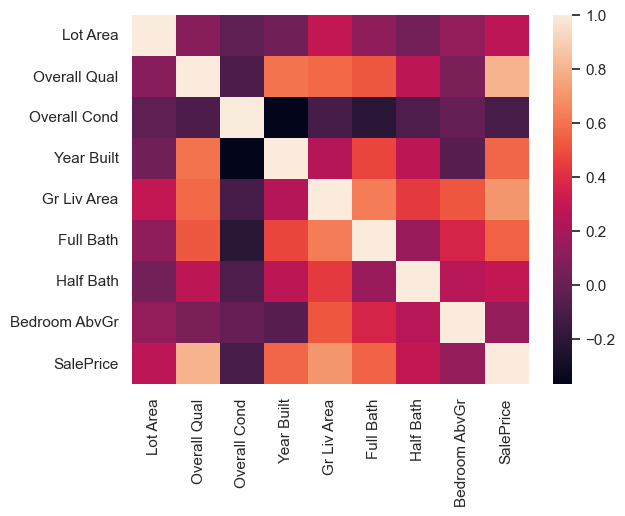

In [35]:
sns.heatmap(df_reduced.corr())

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='MS Zoning'>

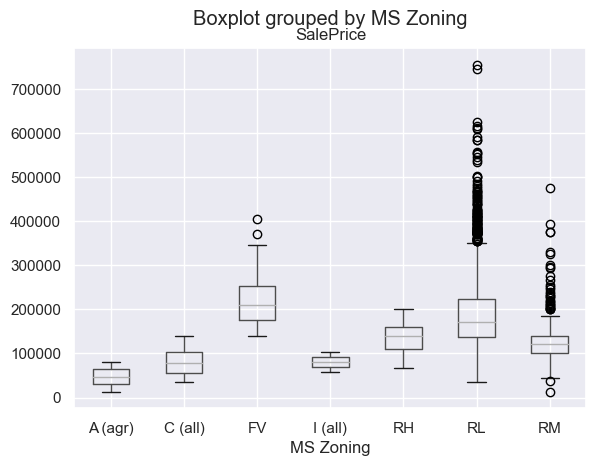

In [38]:
df_reduced.boxplot(column='SalePrice', by='MS Zoning')

<AxesSubplot: title={'center': 'SalePrice'}, xlabel='Neighborhood'>

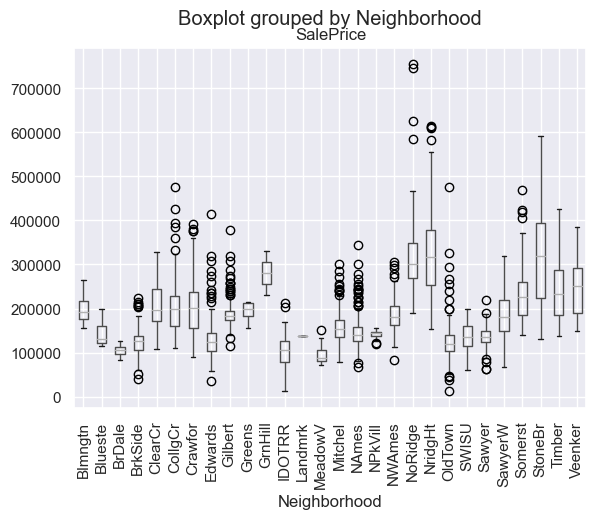

In [39]:
df_reduced.boxplot(column='SalePrice', by='Neighborhood', rot=90)

## Engineering categorical features

In [14]:
df_reduced['MS Zoning']

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: object

In [26]:
zoning_OH_encoder = OneHotEncoder(sparse=False)
# This line is equivalent to first doing a fit and then transform on the same column
one_hot_zoning = zoning_OH_encoder.fit_transform(df_reduced[['MS Zoning']])
one_hot_zoning

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [27]:
zoning_OH_encoder.categories_

[array(['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'],
       dtype=object)]

In [30]:
zoning_one_hot_df = pd.DataFrame(one_hot_zoning, columns=zoning_OH_encoder.categories_[0], dtype=np.int32)
zoning_one_hot_df

,A (agr),C (all),FV,I (all),RH,RL,RM
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2925,0,0,0,0,0,1,0
2926,0,0,0,0,0,1,0
2927,0,0,0,0,0,1,0
2928,0,0,0,0,0,1,0


In [31]:
pd.concat([df_reduced, zoning_one_hot_df], axis=1)

,MS Zoning,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,A (agr),C (all),FV,I (all),RH,RL,RM
0,RL,31770,NAmes,1Fam,1Story,6,5,1960,1656,1,0,3,215000,0,0,0,0,0,1,0
1,RH,11622,NAmes,1Fam,1Story,5,6,1961,896,1,0,2,105000,0,0,0,0,1,0,0
2,RL,14267,NAmes,1Fam,1Story,6,6,1958,1329,1,1,3,172000,0,0,0,0,0,1,0
3,RL,11160,NAmes,1Fam,1Story,7,5,1968,2110,2,1,3,244000,0,0,0,0,0,1,0
4,RL,13830,Gilbert,1Fam,2Story,5,5,1997,1629,2,1,3,189900,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,7937,Mitchel,1Fam,SLvl,6,6,1984,1003,1,0,3,142500,0,0,0,0,0,1,0
2926,RL,8885,Mitchel,1Fam,1Story,5,5,1983,902,1,0,2,131000,0,0,0,0,0,1,0
2927,RL,10441,Mitchel,1Fam,SFoyer,5,5,1992,970,1,0,3,132000,0,0,0,0,0,1,0
2928,RL,10010,Mitchel,1Fam,1Story,5,5,1974,1389,1,0,2,170000,0,0,0,0,0,1,0


Equivalent approach using Pandas:

In [32]:
pd.get_dummies(df_reduced, columns=['MS Zoning'])

,Lot Area,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
0,31770,NAmes,1Fam,1Story,6,5,1960,1656,1,0,3,215000,0,0,0,0,0,1,0
1,11622,NAmes,1Fam,1Story,5,6,1961,896,1,0,2,105000,0,0,0,0,1,0,0
2,14267,NAmes,1Fam,1Story,6,6,1958,1329,1,1,3,172000,0,0,0,0,0,1,0
3,11160,NAmes,1Fam,1Story,7,5,1968,2110,2,1,3,244000,0,0,0,0,0,1,0
4,13830,Gilbert,1Fam,2Story,5,5,1997,1629,2,1,3,189900,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,Mitchel,1Fam,SLvl,6,6,1984,1003,1,0,3,142500,0,0,0,0,0,1,0
2926,8885,Mitchel,1Fam,1Story,5,5,1983,902,1,0,2,131000,0,0,0,0,0,1,0
2927,10441,Mitchel,1Fam,SFoyer,5,5,1992,970,1,0,3,132000,0,0,0,0,0,1,0
2928,10010,Mitchel,1Fam,1Story,5,5,1974,1389,1,0,2,170000,0,0,0,0,0,1,0


We can do one hot encoding for all object columns all at once.

In [34]:
col_types = df_reduced.dtypes
object_cols = col_types[col_types == 'object'].index.tolist()
object_cols

['MS Zoning', 'Neighborhood', 'Bldg Type', 'House Style']

We can check how many unique values each categorical variable has.

In [37]:
df_reduced[object_cols].nunique()

MS Zoning        7
Neighborhood    28
Bldg Type        5
House Style      8
dtype: int64

In [41]:
df_reduced_oh = pd.get_dummies(df_reduced, columns=object_cols, drop_first=True)
df_reduced_oh

,Lot Area,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,MS Zoning_C (all),...,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl
0,31770,6,5,1960,1656,1,0,3,215000,0,...,0,0,0,0,1,0,0,0,0,0
1,11622,5,6,1961,896,1,0,2,105000,0,...,0,0,0,0,1,0,0,0,0,0
2,14267,6,6,1958,1329,1,1,3,172000,0,...,0,0,0,0,1,0,0,0,0,0
3,11160,7,5,1968,2110,2,1,3,244000,0,...,0,0,0,0,1,0,0,0,0,0
4,13830,5,5,1997,1629,2,1,3,189900,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,6,1984,1003,1,0,3,142500,0,...,0,0,0,0,0,0,0,0,0,1
2926,8885,5,5,1983,902,1,0,2,131000,0,...,0,0,0,0,1,0,0,0,0,0
2927,10441,5,5,1992,970,1,0,3,132000,0,...,0,0,0,0,0,0,0,0,1,0
2928,10010,5,5,1974,1389,1,0,2,170000,0,...,0,0,0,0,1,0,0,0,0,0


### Log transforming skew variables

In [49]:
mask = df_reduced.dtypes != 'object'
numerical_cols = df_reduced.dtypes[mask].index.tolist()
numerical_cols

['Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'SalePrice']

In [51]:
# More info about skewness values: https://en.wikipedia.org/wiki/Skewness
skew_vals = df_reduced_oh[numerical_cols].skew()
skew_vals

Lot Area         12.820898
Overall Qual      0.190634
Overall Cond      0.574429
Year Built       -0.604462
Gr Liv Area       1.274110
Full Bath         0.171952
Half Bath         0.697713
Bedroom AbvGr     0.305694
SalePrice         1.743500
dtype: float64

<AxesSubplot: ylabel='Frequency'>

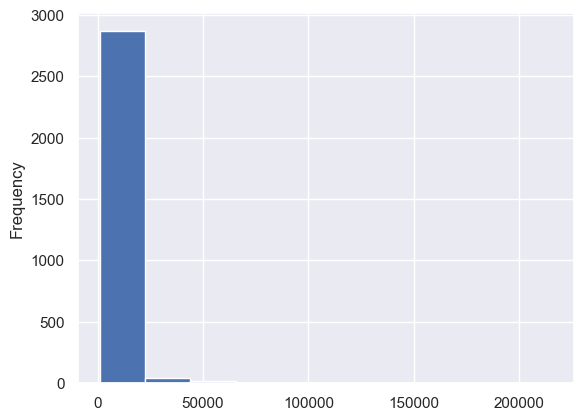

In [52]:
df['Lot Area'].plot(kind='hist')

A better approach is probably to limit the property type to residential. But, for demonstration purposes, this is how we can apply log transformation.

<AxesSubplot: >

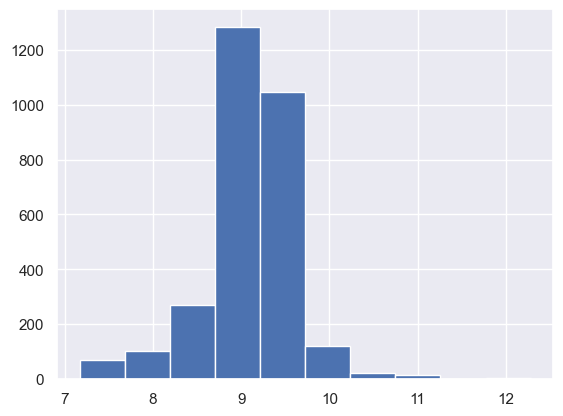

In [53]:
df['Lot Area'].map(np.log1p).hist()

In [54]:
df_reduced_oh['Log Lot Area'] = df['Lot Area'].map(np.log1p)

In [55]:
df_reduced_oh.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,MS Zoning_C (all),...,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Log Lot Area
0,31770,6,5,1960,1656,1,0,3,215000,0,...,0,0,0,1,0,0,0,0,0,10.366309
1,11622,5,6,1961,896,1,0,2,105000,0,...,0,0,0,1,0,0,0,0,0,9.360741
2,14267,6,6,1958,1329,1,1,3,172000,0,...,0,0,0,1,0,0,0,0,0,9.565775
3,11160,7,5,1968,2110,2,1,3,244000,0,...,0,0,0,1,0,0,0,0,0,9.320181
4,13830,5,5,1997,1629,2,1,3,189900,0,...,0,0,0,0,0,0,1,0,0,9.534668


## Interaction feature

Using "age" rather than "year built" can probably help the model make better predictions.

In [56]:
current_year = 2023
current_year - df_reduced_oh['Year Built']

0       63
1       62
2       65
3       55
4       26
        ..
2925    39
2926    40
2927    31
2928    49
2929    30
Name: Year Built, Length: 2930, dtype: int64

In [58]:
df_reduced_oh['Bldg Age'] = current_year - df_reduced_oh['Year Built']

In [59]:
df_reduced_oh

,Lot Area,Overall Qual,Overall Cond,Year Built,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,SalePrice,MS Zoning_C (all),...,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Log Lot Area,Bldg Age
0,31770,6,5,1960,1656,1,0,3,215000,0,...,0,0,1,0,0,0,0,0,10.366309,63
1,11622,5,6,1961,896,1,0,2,105000,0,...,0,0,1,0,0,0,0,0,9.360741,62
2,14267,6,6,1958,1329,1,1,3,172000,0,...,0,0,1,0,0,0,0,0,9.565775,65
3,11160,7,5,1968,2110,2,1,3,244000,0,...,0,0,1,0,0,0,0,0,9.320181,55
4,13830,5,5,1997,1629,2,1,3,189900,0,...,0,0,0,0,0,1,0,0,9.534668,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,7937,6,6,1984,1003,1,0,3,142500,0,...,0,0,0,0,0,0,0,1,8.979417,39
2926,8885,5,5,1983,902,1,0,2,131000,0,...,0,0,1,0,0,0,0,0,9.092232,40
2927,10441,5,5,1992,970,1,0,3,132000,0,...,0,0,0,0,0,0,1,0,9.253591,31
2928,10010,5,5,1974,1389,1,0,2,170000,0,...,0,0,1,0,0,0,0,0,9.211440,49
